**目次**<a id='toc0_'></a>    
- 1. [科学技術計算3課題](#toc1_)    
  - 1.1. [課題03-1：自作関数とライブラリとの比較](#toc1_1_)    
  - 1.2. [課題03-2：共分散行列の計算量の見積もりと実装](#toc1_2_)    
  - 1.3. [課題03-3：疎行列から密行列への変換](#toc1_3_)    
  - 1.4. [課題03-4：行列の性質判定関数の作成](#toc1_4_)    
  - 1.5. [課題03-5：行列の基本変形の関数化](#toc1_5_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[科学技術計算3課題](#toc0_)

**各課題で共通する注意事項**

- 関数にはアノテーション（引数や返り値の型情報）と`docstring`（関数の説明文）を必ず書く．

## 1.1. <a id='toc1_1_'></a>[課題03-1：自作関数とライブラリとの比較](#toc0_)

以下は 2 つのベクトル`a`と`b`の内積を計算する自作関数である．
numpy の組み込み演算子`@`を用いた内積計算と値が一致していることを確認している．


In [1]:
import numpy as np
rng = np.random.default_rng()

def inner_product(a:np.ndarray, b:np.ndarray) -> float:
    """compute inner product <a,b>

    Args:
        a (np.ndarray): vector
        b (np.ndarray): vector

    Returns:
        float: inner product <a,b>
    """
    assert len(a) == len(b)
    assert a.ndim == 1 and b.ndim == 1

    n = len(a)
    accumrated_value = 0  # 注意：'sum'はpythonの組み込み関数なので，変数名には使用しない
    for i in range(n):
        accumrated_value += a[i] * b[i]
    return accumrated_value


n = 50
a = rng.random(n)
b = rng.random(n)

numpy_inner_product = a @ b
my_inner_product = inner_product(a, b)

print(numpy_inner_product, my_inner_product)
print(np.isclose(numpy_inner_product, my_inner_product))


10.483240162297573 10.483240162297575
True


以下のコードは，次元を 2 から 500 までランダムに変更し，ランダムなベクトルを 2 つ生成して，すべてについて自作関数の結果が問題ないことを確認している．


In [2]:
for i in range(500):
    n = rng.integers(low=2, high=500)
    a = rng.random(n)
    b = rng.random(n)

    numpy_inner_product = a @ b
    my_inner_product = inner_product(a, b)

    assert np.isclose(
        numpy_inner_product, my_inner_product
    ), "values doesn't match"


上記のように多数のランダムな入力（テストケース）に対して自作関数の結果を確認することで，バグがないかどうかをチェックできる．

ただし，以下で分かるように，通常は，自作関数は安定したライブラリ（numpy）の 10 倍から100 倍以上遅い．


In [3]:
%timeit numpy_inner_product = a @ b


860 ns ± 9.13 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [4]:
%timeit my_inner_product = inner_product(a, b)


10.5 µs ± 156 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


これらから言えることは以下の通りである．

- プログラミング演習で自作関数を作ることは，内部処理を理解するために重要である．
- しかし実用上は，安定したライブラリを使うこと（使いこなせること）が必須である．
  - 自作関数は，処理が遅い，エラー処理をしていない，数値的に安定ではないアルゴリズムを用いている，など欠点が多数ある．

**課題内容**

上記と同様の手順で，以下の演算の自作関数を作成し，
多数のランダムな入力（次元もランダムに変更する）に対して計算結果が正しいことを確認せよ．

- 行列とベクトルの積`my_mv`（比較対象は`A @ x`）
- 行列同士の積`my_mm`（比較対象は`A @ B`）
- ベクトルの$L_2$ノルム`my_L2norm`（比較対象は`np.linalg.norm(x)`）
- ベクトルの$L_1$ノルム`my_L1norm`（比較対象は`np.linalg.norm(x, ord=1)`）

また，行列やベクトルのサイズを変えて，自作関数の計算時間をライブラリの実行時間と比較せよ．

1. 自作関数とライブラリの実行時間を`%timeit`で計測する．
2. 上記の計測を，行列やベクトルの次元$N=2, 5, 10, 100, 1000$に変更して，それぞれ計測する．
3. 横軸を次元$N$，縦軸を実行時間（秒）として，`matplotlib`でプロットする．
   - ただし両対数グラフにすること
   - 自作関数とライブラリのグラフを1つのプロットにする
4. 上記のプロットを，4つの自作関数のそれぞれについて作成する．


**注意点**

「関数を自作する」とは，上記の自作関数`inner_product`のように，定義に戻って `ndarray` の要素に一つずつアクセスし，総和などを計算することである．numpy の演算子`@`などは使わないこと．



In [13]:
def my_mv(A: np.ndarray, x: np.ndarray) -> np.ndarray:
    """compute Ax

    Args:
        A (ndarray): mxn matrix
        x (ndarray): n-d vector

    Returns:
        (ndarray): m-d vector Ax
    """
    assert A.ndim == 2 and x.ndim == 1
    assert A.shape[1] == x.shape[0]

    # code here

    return 0


def my_mm(A: np.ndarray, B: np.ndarray) -> np.ndarray:
    """compute AB

    Args:
        A (ndarray): mxn matrix
        B (ndarray): nxp matrix

    Returns:
        (ndarray): mxp matrix AB
    """
    assert A.ndim == 2 and B.ndim == 2
    assert A.shape[1] == B.shape[0]

    # code here

    return 0


def my_L2norm(x: np.ndarray) -> float:
    """compute L2 norm of x

    Args:
        x (ndarray): n-d vector

    Returns:
        (float): norm(x)
    """
    assert x.ndim == 1

    # code here

    return 0


def my_L1norm(x: np.ndarray) -> float:
    """compute L1 norm of x

    Args:
        x (ndarray): n-d vector

    Returns:
        (float): norm(x)
    """
    assert x.ndim == 1

    # code here

    return 0

以下は自作関数とライブラリの実行時間のプロットを作成するコード例である．（ただしデータはダミー）

<Figure size 640x480 with 0 Axes>

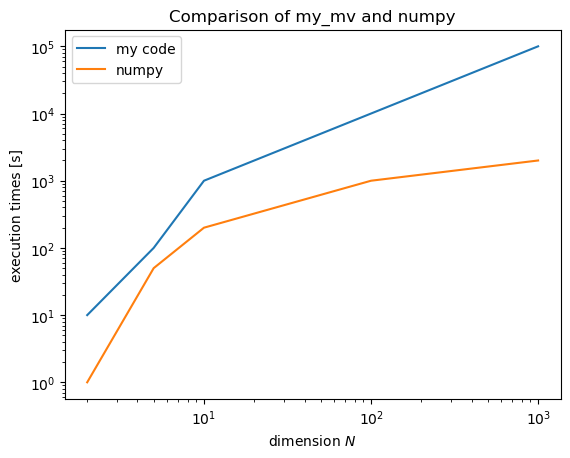

In [14]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["savefig.bbox"] = "tight"
plt.gray()

n_list = [2, 5, 10, 100, 1000]
my_code_exec_times = [10, 100, 1000, 10000, 100000]  # dummy
numpy_exec_times = [1, 50, 200, 1000, 2000]  # dummy

fig = plt.figure()
ax = fig.subplots()

ax.plot(n_list, my_code_exec_times, label="my code")
ax.plot(n_list, numpy_exec_times, label="numpy")

ax.set_title("Comparison of my_mv and numpy")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('dimension $N$')
ax.set_ylabel('execution times [s]')
ax.legend()

plt.plot()
fig.savefig("compare_my_mv.pdf")

以下は自作関数の計算結果が正しいかどうかをライブラリで確認する例である．

In [15]:
for i in range(10):
    m = rng.integers(low=2, high=1000)
    n = rng.integers(low=2, high=1000)
    A = rng.random(size=(m, n))
    x = rng.random(n)

    numpy_Ax = A @ x
    my_Ax = my_mv(A, x)

    assert np.allclose(
        numpy_Ax, my_Ax
    ), "values doesn't match"


for i in range(10):
    m = rng.integers(low=2, high=1000)
    n = rng.integers(low=2, high=1000)
    p = rng.integers(low=2, high=1000)
    A = rng.random(size=(m, n))
    B = rng.random(size=(n, p))

    numpy_AB = A @ B
    my_AB = my_mm(A, B)

    assert np.allclose(
        numpy_AB, my_AB
    ), "values doesn't match"


for i in range(10):
    n = rng.integers(low=2, high=1000)
    x = rng.random(n)

    numpy_norm2 = np.linalg.norm(x)
    my_norm2 = my_L2norm(x)

    numpy_norm1 = np.linalg.norm(x, ord=1)
    my_norm1 = my_L1norm(x)

    assert np.isclose(
        numpy_norm2, my_norm2
    ), "values doesn't match"

    assert np.isclose(
        numpy_norm1, my_norm1
    ), "values doesn't match"


AssertionError: values doesn't match

## 1.2. <a id='toc1_2_'></a>[課題03-2：共分散行列の計算量の見積もりと実装](#toc0_)


**やること**

1. 共分散行列 $S$ を以下の2つの式で計算した場合の計算量（flops）を見積もり，比較する．

    - 式(1)：各サンプルごとに外積を計算して総和する方法
    $$
    S = \frac{1}{m} \sum_{i=1}^m (\boldsymbol{x}_i - \boldsymbol{m})(\boldsymbol{x}_i - \boldsymbol{m})^T
    $$

    - 式(2)：$X$ から平均$\boldsymbol{m}$を引いた行列 $X'_{\mathrm{row}}$ を用いて計算する方法
    $$
    S = \frac{1}{m} (X'_{\mathrm{row}})^T X'_{\mathrm{row}}
    $$

    ただし，平均ベクトル $\boldsymbol{m}$ は計算済みであり，平均ベクトルの計算コストは含めないものとする．
    また，式(2)において $X'_{\mathrm{row}}$ を作成する際はブロードキャストを仮定し，その計算量は含める．

2. データ行列 `X` を引数に受け取り，共分散行列 $S$ を返す2つの関数を実装する．
   -  `X` の形状は $(m, n)$ とし，$m$ はサンプル数，$n$ は特徴量数とする．

    ```python
    def mycov1(X: np.ndarray) -> np.ndarray:
        """式(1)による共分散行列の計算"""

    def mycov2(X: np.ndarray) -> np.ndarray:
        """式(2)による共分散行列の計算"""
    ```

**実行手順**

1. ランダムに多数のデータ行列を生成する．
2. 実装した `mycov1()` と `mycov2()` の結果が，`np.cov()` の結果と一致することを確認する．


## 1.3. <a id='toc1_3_'></a>[課題03-3：疎行列から密行列への変換](#toc0_)

演習資料では，密行列から CSR 形式または COO 形式の疎行列への変換，および疎行列から密行列に変換する方法を説明した．

本課題では，CSR 形式の疎行列の理解を深めるために，**CSR形式から密行列への変換** を自前で実装する．
具体的には，`scipy.sparse` の CSR 形式疎行列 `A` を受け取り，対応する `np.ndarray` の密行列を返す関数 `sparse_to_dense()` を作成する．

**やること**

1. CSR 形式疎行列 `A` を引数に取り，`np.ndarray` 型の密行列を返す関数 `sparse_to_dense()` を実装する．
   - 実装においては，CSR の持つ3つの属性（`A.indptr`, `A.indices`, `A.data`）を利用して密行列を構築すること．
   - `.toarray()` メソッドは使用せず，自前でループを書いて密行列を埋めること．
3. 作成した関数の結果が `.toarray()` の結果と一致することを確認する．
   - `scipy.sparse.random_array` などを用いてランダムに生成した CSR 形式疎行列を用いること

**関数定義**

```python
def sparse_to_dense(A: scipy.sparse._csr.csr_array) -> np.ndarray:
```

## 1.4. <a id='toc1_4_'></a>[課題03-4：行列の性質判定関数の作成](#toc0_)

**やること**

1. 行列 $A$ が与えられたとき，その行列が特定の性質を満たすかどうかを判定する関数 `is_***()` を作成する．
2. 判定する性質は以下のものとする．
    - 正方行列 (`is_square()`)
    - 対称行列 (`is_symmetric()`)
    - 対角行列 (`is_diagonal()`)
      - 三重対角行列 (`is_tridiagonal()`)
    - 上三角行列 (`is_upper_triangular()`)
      - 単位上三角行列 (`is_unit_upper_triangular()`)
      - 狭義上三角行列 (`is_strict_upper_triangular()`)
    - 下三角行列 (`is_lower_triangular()`)
      - 単位下三角行列 (`is_unit_lower_triangular()`)
      - 狭義下三角行列 (`is_strict_lower_triangular()`)
    - 上ヘッセンベルグ行列 (`is_upper_hessenberg()`)
    - 下ヘッセンベルグ行列 (`is_lower_hessenberg()`)
3. それぞれの関数は `True` または `False` を返すこと．

**関数定義**

上記のうち1つを示す（他は同様である）．

```python
def is_symmetric(
    A: np.ndarray,
    atol: float = 1e-8,
    rtol: float = 1e-8,
) -> bool:
```

**実行手順**

  1. 行列の例（正方行列，非正方行列，対角行列，三重対角行列など）を用意する．
  2. 作成した各関数を適用し，正しく判定できることを確認する．

**注意点**

  - 判定には NumPy の関数や演算を活用してよい．
  - 数値誤差を考慮し，等号判定には `np.allclose()` を用いること．
    - そのために，作成する関数の引数には`atol`と`rtol`を取り，その値を`np.allclose()`に利用すること．


## 1.5. <a id='toc1_5_'></a>[課題03-5：行列の基本変形の関数化](#toc0_)

行列の基本変形を行う関数を実装する．
ここで扱う基本変形は，行と列のそれぞれについて定数倍・置換・線形和の3種類，合計6種類である．

ただし，作成する関数はin-place版と非破壊版の2種類を作成する．
**in-place** とは，引数に与えた元の変数の値そのものを直接書き換える操作を指す．したがってコピーは作られない．
一方で，ここで **非破壊版** と呼ぶ実装は，引数に与えた元の変数の値をコピーしてから処理を行い，そのコピーを返す方式である．この場合，元の変数は保持される．

**やること**

1. 6つの基本変形の関数を，数式の定義通りではなく，効率的な実装を行う．それぞれについて，**in-place 版**と**非破壊版**の両方を実装すること．

   - 行操作
     - `row_scale(A, i, alpha)`: 行 $i$ を $\alpha$ 倍する
     - `row_swap(A, i, j)`: 行 $i$ と行 $j$ を置換する
     - `row_axpy(A, i, j, alpha, beta, gamma, delta)`: 行 $i$ を $\alpha * 行i + \beta * 行j$に，行 $j$ を $\gamma * 行i + \delta * 行j$にする．
   - 列操作（以下同様）
     - `col_scale(A, j, alpha)`
     - `col_swap(A, j, k)`
     - `col_axpy(A, j, k, alpha)`

2. 乱数で生成した行列に対して，異なる基本変形を複数回適用し，結果が期待通りかを検証する．


**実行手順**

1. 乱数で行列 `A` を生成する．．
2. 作成した関数を使って，行または列の基本変形を複数回適用し，毎回の**変形前後の結果**を比較・記録する．
   - in-place版と非破壊版を比較し，副作用（元の変数が変わるかどうか）を確認する．

**関数定義**

上記のうち1つを示す（他は同様である）．

```python
def row_scale(A: np.ndarray, i: int, alpha: float) -> np.ndarray:
    """行を定数倍する関数（非破壊版）．変更した行列を返す．行列Aは変更されない．"""

def row_scale_inplace(A: np.ndarray, i: int, alpha: float) -> None:
    """行を定数倍する関数（in-place版）．行列Aを直接変更する．返り値を持たない"""
```

**オプション**

可能なら，1つの関数でin-place版と非破壊版の両方を同時に実装してよい．この場合には，
in-placeにするかどうかの引数を付け加えること．
